In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [2]:
sup_df = pd.read_csv('team_comp_df/sup_affinity.csv')
bot_df = pd.read_csv('team_comp_df/bot_affinity.csv')
mid_df = pd.read_csv('team_comp_df/mid_affinity.csv')
jng_df = pd.read_csv('team_comp_df/jng_affinity.csv')
top_df = pd.read_csv('team_comp_df/top_affinity.csv')
team_performance = pd.read_csv('team_comp_df/team_performance.csv')
team_conversion = pd.read_csv('team_comp_df/team_early_performance.csv')

In [3]:
team_names = sup_df['team']
#team_names

In [4]:
sup_df.drop(['team', 'Unnamed: 0'], axis = 1, inplace = True)
bot_df.drop(['team', 'Unnamed: 0'], axis = 1, inplace = True)
mid_df.drop(['team', 'Unnamed: 0'], axis = 1, inplace = True)
jng_df.drop(['team', 'Unnamed: 0'], axis = 1, inplace = True)
top_df.drop(['team', 'Unnamed: 0'], axis = 1, inplace = True)
team_performance.drop(['team', 'labels', 'Unnamed: 0'], axis = 1, inplace = True)
team_conversion.drop(['team', 'Unnamed: 0'], axis = 1, inplace = True)

In [5]:
sup_normalized = (sup_df - sup_df.min())/(sup_df.max() - sup_df.min())
bot_normalized = (bot_df - bot_df.min())/(bot_df.max() - bot_df.min())
mid_normalized = (mid_df - mid_df.min())/(mid_df.max() - mid_df.min())
jng_normalized = (jng_df - jng_df.min())/(jng_df.max() - jng_df.min())
top_normalized = (top_df - top_df.min())/(top_df.max() - top_df.min())
team_conversion_normalized = (team_conversion - team_conversion.min())/(team_conversion.max() - team_conversion.min())

In [6]:
bot_normalized.columns = ['botFb%', 'botFbFirstHerald%', 'botFbFirstDragon%', 'botFbGoldAt10%',
       'FbGoldAt10Bot%', 'botFbCsdiff%', 'botFbXpdiff%', 'botFbFirstTower%', 'BotGd10%',
       'botGd10Gd15%', 'botGd15%', 'botGd15Wr%', 'botGd15Firstto3%',
       'botXp10%', 'botXp10Xp15%', 'botCs@10%', 'botCs10Cs15%']

In [7]:
mid_normalized.columns = ['midFb%', 'midFbFirstHerald%', 'midFbFirstDragon%', 'midFbGoldAt10%',
       'midFbGoldAt10Mid%', 'midFbCsdiff%', 'midFbXpdiff%', 'midFbFirstTower%', 'midGd10%',
       'midGd10Gd15%', 'midGd15%', 'midGd15Wr%', 'midGd15Firstto3%',
       'midXp10%', 'midXp10Xp15%', 'midcs@10%', 'midcs10Cs15%']

In [8]:
jng_normalized.columns = ['jngFb%', 'jngFbFirstHerald%', 'jngFbFirstDragon%', 'jngFbGoldAt10%',
       'jngFbGoldAt10Jng%', 'jngFbCsdiff%', 'jngFbXpdiff%', 'jngGd10%', 'jngGd10Gd15%',
       'jngGd15%', 'jngGd15Wr%', 'jngXp10%', 'jngXp10Xp15%', 'jngCs10%',
       'jngcs10Cs15%', 'jngFirstDragon%', 'jngFirstHerald%', 'jngEnemyMonstersPerGame',
       'jngWardsKilledPerGame', 'jngWardsPerMinute', 'jngVisionScorePM']

In [9]:
top_normalized.columns = ['topFb%', 'topFbFirstHerald%', 'topFbFirstDragon%', 'topFbGoldAt10%',
       'topFbGoldAt10Top%', 'topFbCsdiff%', 'topFbXpdiff%', 'topFbFirstTower%', 'topGd10%',
       'topGd10Gd15%', 'topGd15%', 'topGd15Wr%', 'topGd15Firstto3%',
       'topXp10%', 'topXp10Xp15%', 'topCs10%', 'topCs10Cs15%']

In [10]:
team_comparison = []
for i in range(len(team_names)):
    aux = [team_names[i]] + team_performance.iloc[i].values.tolist() + team_conversion_normalized.iloc[i].values.tolist() + sup_normalized.iloc[i].values.tolist() + bot_normalized.iloc[i].values.tolist() + mid_normalized.iloc[i].values.tolist() + jng_normalized.iloc[i].values.tolist() + top_normalized.iloc[i].values.tolist()
    team_comparison.append(aux)
    
tc_columns = ['team'] + team_performance.columns.tolist() + team_conversion_normalized.columns.tolist() + sup_normalized.columns.tolist() + bot_normalized.columns.tolist() + mid_normalized.columns.tolist() + jng_normalized.columns.tolist() + top_normalized.columns.tolist()
team_comparison_df = pd.DataFrame(team_comparison, columns = tc_columns)

In [13]:
team_comparison_df

,team,gamelength,winrate,KDA,firstblood,firstdragon,dragons,firstherald,heralds,barons,...,topFbFirstTower%,topGd10%,topGd10Gd15%,topGd15%,topGd15Wr%,topGd15Firstto3%,topXp10%,topXp10Xp15%,topCs10%,topCs10Cs15%
0,Suning,0.570271,0.765306,0.675709,0.607143,0.803571,0.794543,0.285714,0.578313,0.789474,...,1.000000,0.571429,1.000000,1.000000,0.685714,0.606417,0.962348,1.000000,0.303490,0.121212
1,LGD Gaming,0.608605,0.693277,0.589981,0.808824,0.595588,0.723728,0.411765,0.714387,0.464396,...,1.000000,0.621849,0.741667,0.659345,0.457143,0.606417,0.767442,1.000000,0.544497,1.000000
2,MAD Lions,0.475244,0.551471,0.459247,0.477941,0.512868,0.693985,0.573529,0.674699,0.534056,...,0.666667,0.004202,0.304487,0.023455,0.000000,0.046791,0.000000,0.210702,0.052441,0.400826
3,PSG Talon,0.494571,0.681818,0.845083,0.261364,0.562500,0.720123,0.522727,0.628697,0.627990,...,1.000000,0.493506,0.246528,0.482307,0.546584,0.000000,1.000000,0.118207,0.854428,0.363636
4,Legacy Esports,0.439041,0.811688,0.929580,0.590909,0.596591,0.715015,0.545455,0.725812,0.741627,...,0.666667,0.948052,0.719203,0.953203,0.844720,0.393048,0.780362,0.642063,0.763898,0.678492
5,Team Liquid,0.686248,0.642857,0.705188,0.400000,0.581250,0.634831,0.450000,0.640964,0.763158,...,1.000000,0.407143,0.000000,0.240717,0.703297,0.328260,0.679328,0.168038,0.673369,0.171429
6,Rainbow7,0.754404,0.607143,0.566839,0.500000,0.450000,0.747191,0.483333,0.708434,0.657895,...,0.750000,0.707143,0.650901,0.601055,0.268908,0.363322,0.582687,0.413665,0.753035,0.501229
7,INTZ,0.564089,0.526932,0.484401,0.463115,0.571721,0.665868,0.508197,0.641517,0.556514,...,0.250000,0.234192,0.538690,0.310127,0.408163,0.292781,0.032151,0.358696,0.180353,0.312253
8,V3 Esports,0.540338,0.687332,0.745821,0.712264,0.551887,0.683697,0.566038,0.700159,0.655412,...,0.000000,0.272237,0.483333,0.344399,0.685714,0.709733,0.423139,0.267081,0.135998,0.167464
9,Unicorns Of Love.CIS,0.211490,0.853175,0.827614,0.666667,0.687500,0.699126,0.685185,0.937082,0.657895,...,0.500000,0.634921,0.677083,0.671120,1.000000,0.880849,0.448464,0.292354,0.385685,0.578182


In [11]:
dendrogram_data = team_comparison_df.copy()
dendrogram_data.drop('team', axis = 1, inplace = True)

In [12]:
dendrogram_data = dendrogram_data.fillna(0)

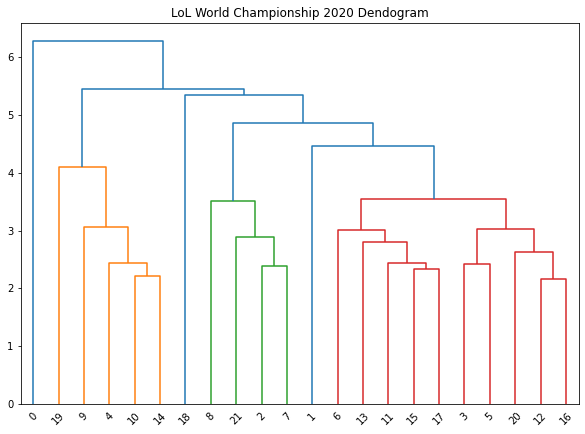

In [13]:
plt.figure(figsize = (10, 7))
plt.title('LoL World Championship 2020 Dendogram')
dend = shc.dendrogram(shc.linkage(dendrogram_data, method = 'ward'))

In [13]:
OMP_NUM_THREADS=1

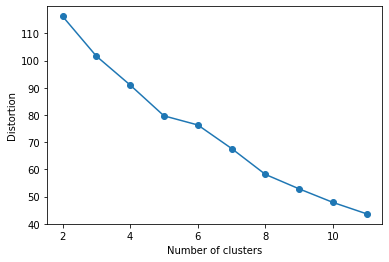

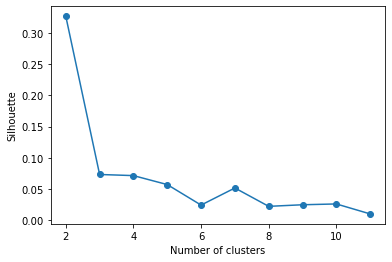

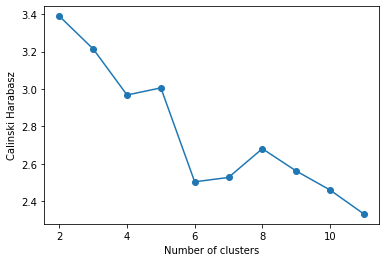

In [27]:
distortions = []
sil = []
cal = []
for i in range(2, 12):
    km = KMeans(n_clusters = i, init = 'random', n_init = 10, max_iter = 500, tol = 1e-04, random_state = 43)
    km.fit(dendrogram_data)
    distortions.append(km.inertia_)
    
    #silhouette
    preds = km.fit_predict(dendrogram_data)
    sil.append(silhouette_score(dendrogram_data, preds))
    #print("n_clusters = {}, silhouette score {}".format(i, sil))
    
    #calinski_harabaz
    lbls = km.labels_
    cal.append(metrics.calinski_harabasz_score(dendrogram_data, lbls))
    #print("n_clusters = {}, silhouette score {} | calinski harabaz score {}".format(i, sil, cal))
    #print("------")
    
plt.plot(range(2, 12), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

plt.plot(range(2, 12), sil, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.show()

plt.plot(range(2, 12), cal, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski Harabasz')
plt.show()

In [14]:
from yellowbrick.cluster import silhouette_visualizer

kmeans = KMeans(n_clusters = 2, init = 'random').fit(dendrogram_data)

# Load a clustering dataset
X = dendrogram_data
y = kmeans.labels_

# Specify rows to cluster: under 40 y/o and have either graduate or university education
#X = X[(X['age'] <= 40) & (X['edu'].isin([1,2]))]

# Use the quick method and immediately show the figure
silhouette_visualizer(KMeans(2, random_state=42), X, colors='yellowbrick')

ImportError: cannot import name 'safe_indexing' from 'sklearn.utils' (D:\Anaconda\lib\site-packages\sklearn\utils\__init__.py)

In [28]:
clustering_consistency = []
for i in range(500):
    kmeans = KMeans(n_clusters = 2, init = 'random').fit(dendrogram_data)
    labels = pd.DataFrame(kmeans.labels_)
    labels = [labels.iloc[i][0] for i in range(len(labels))]
    clustering_consistency.append(labels)
    
clustering_consistency = pd.DataFrame(clustering_consistency, columns = team_names)

In [29]:
clustering_consistency

team,Suning,LGD Gaming,MAD Lions,PSG Talon,Legacy Esports,Team Liquid,Rainbow7,INTZ,V3 Esports,Unicorns Of Love.CIS,...,Rogue,DAMWON Gaming,Gen.G,Team SoloMid,Machi Esports,G2 Esports,JD Gaming,Top Esports,DRX,Fnatic
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,1,1,1,1,0,...,1,0,0,1,1,1,1,0,1,1
4,0,1,1,1,0,1,1,1,1,0,...,1,1,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
496,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
497,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
498,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [30]:
pwdistances = pairwise_distances(clustering_consistency.values, metric = normalized_mutual_info_score)

In [31]:
pwdistances

array([[1.        , 0.20862145, 0.49799056, ..., 1.        , 0.49799056,
        1.        ],
       [0.20862145, 1.        , 0.11399497, ..., 0.20862145, 0.11399497,
        0.20862145],
       [0.49799056, 0.11399497, 1.        , ..., 0.49799056, 1.        ,
        0.49799056],
       ...,
       [1.        , 0.20862145, 0.49799056, ..., 1.        , 0.49799056,
        1.        ],
       [0.49799056, 0.11399497, 1.        , ..., 0.49799056, 1.        ,
        0.49799056],
       [1.        , 0.20862145, 0.49799056, ..., 1.        , 0.49799056,
        1.        ]])

<AxesSubplot:>

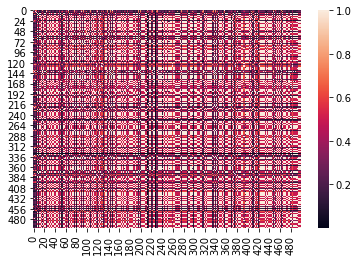

In [32]:
sns.heatmap(pwdistances)

In [33]:
np.mean(pwdistances)

0.5514847859338622

In [34]:
np.std(pwdistances)

0.3331677151889533

In [35]:
kmeans.cluster_centers_

array([[0.51742766, 0.66278034, 0.64266849, 0.56592203, 0.57263423,
        0.69741458, 0.52920607, 0.69832264, 0.58292639, 0.7219799 ,
        0.72415407, 0.50411522, 0.67607894, 0.68786035, 0.64935674,
        0.55631179, 0.34704917, 0.30623342, 0.54884164, 0.49865492,
        0.64351146, 0.66575293, 0.49437343, 0.52382792, 0.37949354,
        0.29560634, 0.54333557, 0.47399876, 0.55163777, 0.54562873,
        0.50899201, 0.51391227, 0.58543095, 0.47898592, 0.40888169,
        0.45817306, 0.54567918, 0.61642399, 0.76746642, 0.91156746,
        0.65402015, 0.60308761, 0.67458181, 0.56364105, 0.53797359,
        0.43672208, 0.44690426, 0.39557694, 0.31902043, 0.39056974,
        0.50934296, 0.51834286, 0.36010484, 0.56789141, 0.50929654,
        0.52191108, 0.61080898, 0.50676046, 0.65098906, 0.60136364,
        0.51831919, 0.52360621, 0.52101555, 0.41574267, 0.45285314,
        0.65785766, 0.59914037, 0.61244116, 0.67152043, 0.57491132,
        0.66079678, 0.55197793, 0.82456006, 0.83

In [36]:
cluster_center = kmeans.cluster_centers_
c = cluster_center[0]/cluster_center[1]

<ipython-input-36-ef28cd5d5bcb>:2: RuntimeWarning: divide by zero encountered in true_divide
  c = cluster_center[0]/cluster_center[1]


In [38]:
cluster_df_revised = pd.DataFrame(cluster_center, columns = dendrogram_data.columns)
cluster_df_revised.to_csv('cluster_df_revised.csv')

In [12]:
#cluster_df = pd.DataFrame(cluster_center, columns = dendrogram_data.columns)
cluster_df = pd.read_csv('clustering_centroids.csv')
cluster_df

,Unnamed: 0,gamelength,winrate,KDA,firstblood,firstdragon,dragons,firstherald,heralds,barons,...,topFbFirstTower%,topGd10%,topGd10Gd15%,topGd15%,topGd15Wr%,topGd15Firstto3%,topXp10%,topXp10Xp15%,topCs10%,topCs10Cs15%
0,0,0.477442,0.699956,0.708405,0.562145,0.610559,0.710442,0.557693,0.737536,0.599986,...,0.788115,0.549239,0.453734,0.554046,0.614027,0.545923,0.584397,0.309503,0.554581,0.502080
1,1,0.496485,0.817921,0.814644,0.506696,0.823661,0.818620,0.361607,0.647590,0.789474,...,1.000000,0.651786,0.870833,0.879351,0.800000,0.477273,0.742317,0.714976,0.388847,0.231061
2,2,0.566299,0.617343,0.562324,0.570539,0.526282,0.681492,0.494389,0.650395,0.562076,...,0.447751,0.472970,0.500397,0.504357,0.377417,0.319573,0.360853,0.337891,0.458077,0.426717


In [13]:
cluster_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [14]:
cluster_df

,gamelength,winrate,KDA,firstblood,firstdragon,dragons,firstherald,heralds,barons,firsttower,...,topFbFirstTower%,topGd10%,topGd10Gd15%,topGd15%,topGd15Wr%,topGd15Firstto3%,topXp10%,topXp10Xp15%,topCs10%,topCs10Cs15%
0,0.477442,0.699956,0.708405,0.562145,0.610559,0.710442,0.557693,0.737536,0.599986,0.801957,...,0.788115,0.549239,0.453734,0.554046,0.614027,0.545923,0.584397,0.309503,0.554581,0.502080
1,0.496485,0.817921,0.814644,0.506696,0.823661,0.818620,0.361607,0.647590,0.789474,0.596939,...,1.000000,0.651786,0.870833,0.879351,0.800000,0.477273,0.742317,0.714976,0.388847,0.231061
2,0.566299,0.617343,0.562324,0.570539,0.526282,0.681492,0.494389,0.650395,0.562076,0.624230,...,0.447751,0.472970,0.500397,0.504357,0.377417,0.319573,0.360853,0.337891,0.458077,0.426717


In [15]:
#cluster_df.to_csv('clustering_centroids.csv')

In [16]:
attributes = cluster_df.columns.tolist()

In [17]:
step1 = len(team_performance.columns.tolist())
step2 = step1 + len(team_conversion_normalized.columns.tolist())
step3 = step2 + len(sup_normalized.columns.tolist())
step4 = step3 + len(bot_normalized.columns.tolist())
step5 = step4 + len(mid_normalized.columns.tolist())
step6 = step5 + len(jng_normalized.columns.tolist())
step7 = step6 + len(top_normalized.columns.tolist())

In [18]:
team_performance_attr = attributes[:step1]
team_conversion_attr = attributes[step1:step2]
sup_attr = attributes[step2:step3]
bot_attr = attributes[step3:step4]
mid_attr = attributes[step4:step5]
jng_attr = attributes[step5:step6]
top_attr = attributes[step6:]

In [19]:
team_performance_clusters = cluster_df[team_performance_attr]
team_conversion_clusters = cluster_df[team_conversion_attr]
sup_clusters = cluster_df[sup_attr]
bot_clusters = cluster_df[bot_attr]
mid_clusters = cluster_df[mid_attr]
jng_clusters = cluster_df[jng_attr]
top_clusters = cluster_df[top_attr]

In [20]:
def pie_o_matic(df, df2, df3):
    categories_0 = df.columns.tolist()
    label_0 = df.values.tolist()
    categories_1 = df2.columns.tolist()
    label_1 = df2.values.tolist()
    categories_2 = df3.columns.tolist()
    label_2 = df3.values.tolist()
    
    team_0 = label_0[0][0]
    label_0 = label_0[0][1:]
    team_1 = label_1[0][0]
    label_1 = label_1[0][1:]
    team_2 = label_2[0][0]
    label_2 = label_2[0][1:]
    
   
    categories_0 = categories_0[1:]
    categories_0 = [*categories_0, categories_0[0]]
    categories_1 = categories_1[1:]
    categories_1 = [*categories_1, categories_1[0]]
    categories_2 = categories_2[1:]
    categories_2 = [*categories_2, categories_2[0]]
    
    type_0 = [*label_0, label_0[0]]
    type_1 = [*label_1, label_1[0]]
    type_2 = [*label_2, label_2[0]]
    
    label_loc = np.linspace(start = 0, stop = 2*np.pi, num = len(type_0))
    
    plt.figure(figsize = (8,8))
    plt.subplot(polar = True)
    plt.plot(label_loc, type_0, label = 'type_0')
    plt.plot(label_loc, type_1, label = 'type_1')
    plt.plot(label_loc, type_2, label = 'type_2')
    plt.title("team comparisons", size = 20, y = 1.05)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels = categories_0)
    plt.legend
    plt.show

In [21]:
team_performance_clusters.insert(0, "label", [0, 1, 2])

### Descripción de los centroides en contexto con el desempeño que presentan en League of Legends

Los centroides del agrupamiento por KMeans representan el promedio de los valores que todos los integrantes del grupo resentan en los distintos integrantes.
Los atributos representados en los centroides estan normalizados para facilitar el proceso de agrupación, sin embargo, aun asi es relativamente sencillo interpretar todas las columnas a excepción de "gamelength" entre el valor sea mayor entonces significa que es mejor.

Para facilitar la interpretación de los datos podemos segmentar en distintos conjuntos de atributos, estos segmentos de atributos estan relacionados entre si, descrbiendo el desempeño de cada jugador individual que integra un equipo, las estadisticas generales de un equipo y su desempeño

### Los centroides como "estilos de juego"

En League of Legends (LoL) existen una gran cantidad de variables en cada partida, por lo tanto podriamos pensar que es dificil trazar un "estilo de juego" para un equipo o un conjunto de equipos, sin embargo, a pesar de la gran cantidad de cosas que pueden cambiar partida a partida hay un conjunto de decisiones "optimas" o "correctas" que permiten a los jugadores extender ventajas que hayan obtenido, por lo tanto podemos hacer un experimento de agrupación para tratar de buscar los posibles grupos de "estilos de juegos" que estan conformados por un conjunto de "decisiones" y preferencias dentro del juego.

Estos estilos de juego permite entender las posibles decisiones que toman los equipos mas exitosos del mundo (ya que el estudio fue enfocado unicamente en los 22 equipos clasificados al campeonato mundial de 2020) y entender la razon por la cual estan teniendo tal cantidad de exito y representando globalmente el pico de habilidad en League of Legends a nivel profesional.

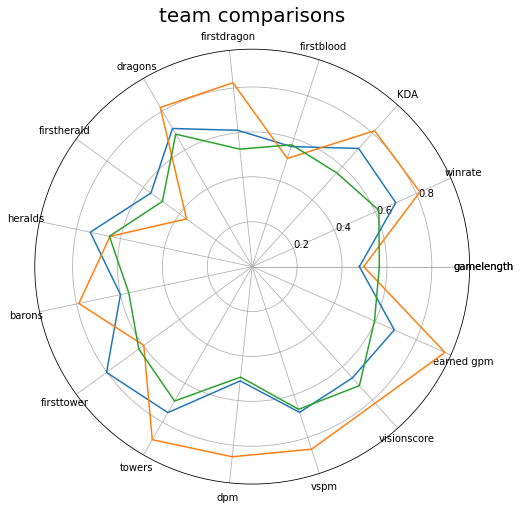

In [37]:
pie_o_matic(team_performance_clusters[team_performance_clusters['label'] == 0], team_performance_clusters[team_performance_clusters['label'] == 1], team_performance_clusters[team_performance_clusters['label'] == 2])

In [38]:
team_performance_clusters

,label,gamelength,winrate,KDA,firstblood,firstdragon,dragons,firstherald,heralds,barons,firsttower,towers,dpm,vspm,visionscore,earned gpm
0,0,0.477442,0.699956,0.708405,0.562145,0.610559,0.710442,0.557693,0.737536,0.599986,0.801957,0.750947,0.511721,0.682514,0.666895,0.692882
1,1,0.496485,0.817921,0.814644,0.506696,0.823661,0.818620,0.361607,0.647590,0.789474,0.596939,0.890242,0.851563,0.855203,0.818651,0.939633
2,2,0.566299,0.617343,0.562324,0.570539,0.526282,0.681492,0.494389,0.650395,0.562076,0.624230,0.691407,0.494819,0.668213,0.713484,0.596159


### Comparando el desempeño general del equipo

Este primer conjunto de datos contiene información general que carateriza al equipo, tenemos información como la duración promedio de sus partidas, la cantidad de objetivos neutrales y estructuras destruidas asi como el daño por minuto promedio, dinero generado y vision colocada.

El conjunto de equipos con mejor desempeño general son aquellos etiquetados con el número 1, todos los equipos que forman parte de este conjunto tienen un porcentaje de victorias alto de los grupos con un valor 0.817 (normalizado), esto puede ser observado facilmente gracias a sus valores en los departamentos de: KDA (valor de asesinatos y asistencias divido entre las muertes del equipo) asi como su DPM (daño por minuto) y "earned gpm" (oro por minuto conseguido).
Podemos determinar que las ventajas obtenidas vienen del cuadrante inferior del mapa con un simple vistazo en los objetivos neutrales que controlan durante la partida, el "dragon" y el "heraldo" del mapa se encuentran en sectores opuestos, el heraldo se encuentra entre los carriles superior e intermedio del mapa, mientras que el dragon se encuentra entre el carril intermedio e inferior, con un valor de 0.823 de primer dragon obtenido y 0.816 dragones por partida en comparación a el 0.361 valor de primer heraldo y unicamente 0.647 heraldos por partida, podemos observar que este conjunto de equipos juega completamente decantado al sector inferior del mapa, lo cúal les permite tener un alto control de estructuras y visión del mapa, con un valor de 0.89 torretas destruidas por juego y 0.855 en visión por minuto durante las partidas.

El conjunto de equipos etiquetados con el número 0 tienen en general las partidas mas rapidas con una duración de juego de 0.477, podemos observar que estos equipos intentan tomar las ventajas que puedan desde cualquier sector del mapa, tienen el indice mas alto de primer torreta destruida del juego con un valor de 0.801, non estan decantados a ningun sector del mapa con valores de primer heraldo y dragon que son extremadamente similares con 0.557 y 0.610 respectivamente, asi como 0.737 y 0.710 en cuanto a heraldos y dragones obtenidos por partida.

Por ultimo el conjunto de equipoos etiquetado por el número 2 presentan algunos atributos opuestos a aquellos encontrados con la etiqueta 1, no solo tienen las partidas mas largas con un 0.566 en duración, sino que tambien tienen el oro por minuto mas bajo con 0.596, ademas de esto tienen el daño por minuto mas bajo con 0.494 y el KDA mas bajo de 0.562, no presentan una inclinación en ningun sector del mapa al tener un valor de primer heraldo y primer dragon de 0.526 y 0.494 de primer heraldo.

In [45]:
team_conversion_denormalized = team_conversion_clusters*(team_conversion.max() - team_conversion.min())+team_conversion.min()

In [47]:
team_conversion_denormalized.insert(0, "label", [0, 1, 2])

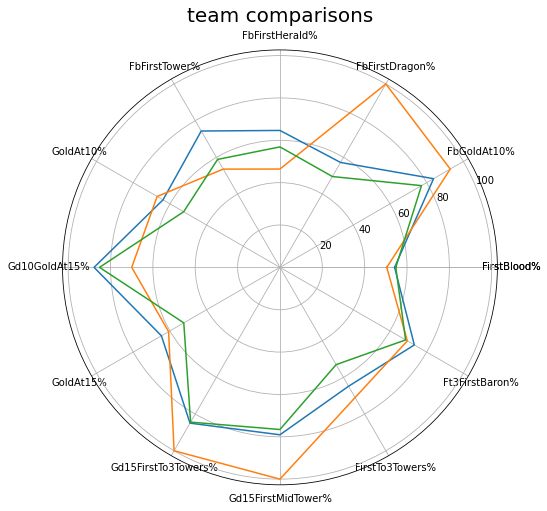

In [49]:
pie_o_matic(team_conversion_denormalized[team_conversion_denormalized['label'] == 0], team_conversion_denormalized[team_conversion_denormalized['label'] == 1], team_conversion_denormalized[team_conversion_denormalized['label'] == 2])

In [50]:
team_conversion_denormalized

,label,FirstBlood%,FbGoldAt10%,FbFirstDragon%,FbFirstHerald%,FbFirstTower%,GoldAt10%,Gd10GoldAt15%,GoldAt15%,Gd15FirstTo3Towers%,Gd15FirstMidTower%,FirstTo3Towers%,Ft3FirstBaron%
0,0,54.142986,83.757516,57.205413,64.653071,74.344069,63.759383,87.789441,64.635564,84.947367,79.060469,64.819091,73.267020
1,1,50.446429,92.857143,100.000000,46.428571,53.571429,66.964286,70.000000,60.714286,100.000000,100.000000,70.982143,69.444444
2,2,54.702577,77.175400,49.524261,56.885144,58.862512,52.509283,85.213166,52.437435,84.385372,76.565089,53.046658,68.517457


### Capacidad de aprovechamiento de ventajas

Este conjunto de atributos miden la capacidad de los equipos para aprovechar las posibles ventajs tempranas que puedan adquirir, para facilitar la lectura d elos valores se ha desnormalizado los valores para comprender los porcentajes de manera mas directa.
Podemos observar que todos los conjuntos comparten un porcentaje de primer asesinato de la partida, esto es importante de resaltar porque comunmente este primer acontencimiento de la partida dictamina los primeros minutos del juego sobre quien posee la ventaja, de esta misma manera podemos unir ciertos acontecimientos como ventajas de oro, objetivos neutrales y estructuras a esta ventaja temprana, sin embargo, esto no es lo que queremos analizar, lo importante es entender la capacidad de los equipos para convertir esta primer ventaja en mas ventajas.

Algo muy importante de resaltar es la capacidad de los equipso pertenecientes al conjunto 1 de conseguir el primer dragon del juego, ya que siempre que consiguen el primer asesinato del juego 100% de las veces consiguen obtener el primer dragon del juego, esto nos importa porque dentro del juego la cantidad de dragones que se derrotan son importantes mejoras de estadisticas para todos los personajes que juegan los integrates del equipo 1, no solo esto pero 92.8% de las veces estos mismos equipos asi mismo son capaces de mantener una ventaja de oro sobre su oponente. El 66.9% de las partidas que juegan logran conseguir una ventaja de oro al minuto 10 y para ponerlo en perspectiva 62.3% es el porcentaje si solo contamos las veces que obtuvieron la primera sangre, a pesar de esto tienen el porcentaje mas bajo de sostener su ventaja de oro entre el minuto 10 y el minuto 15 de la partida con solo 70% de retención de la ventaja.
60% de sus partidas logran obtener o retener su ventaja de oro al minuto 15, lo impresionante viene cuando logran obtener o mantener la ventaja ya que 100% de las veces logran destruir las primeras tres estructuras enemigas primero asi como destruir la torreta del carril intermedio, esta torreta mantiene una gran importancia gracias a su posición y el acceso que le brinda al equipo enemigo dentro del territorio de un equipo.

Lo mas destacado del conjunto de equipos catalogados por el estilo de juego 0 podemos notar que tienen la mayor conversión de primer asesinato a primer torreta destruida del juego con 74.34% de las partidas donde consiguien la primera sangre tambien destruyen la primer estructura del enemigo, ademas de esto tienen la mayor retención de ventajas del minuto 10 al minuto 15 con un 87.78% de retención de ventaja de oro.

In [52]:
sup_clusters.insert(0, "label", [0, 1, 2])

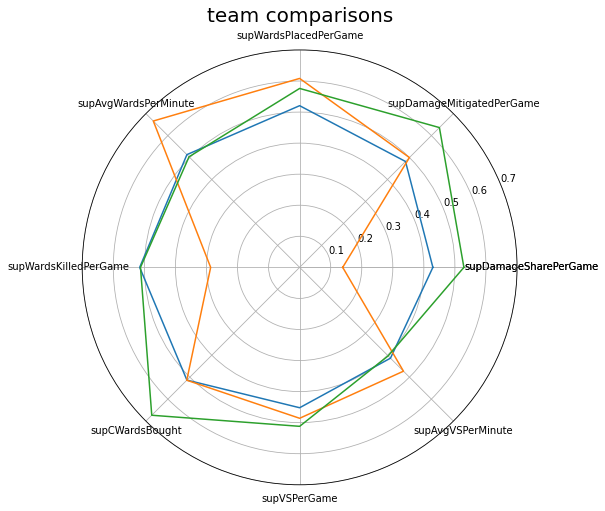

In [54]:
pie_o_matic(sup_clusters[sup_clusters['label'] == 0], sup_clusters[sup_clusters['label'] == 1], sup_clusters[sup_clusters['label'] == 2])

In [53]:
sup_clusters

,label,supDamageSharePerGame,supDamageMitigatedPerGame,supWardsPlacedPerGame,supAvgWardsPerMinute,supWardsKilledPerGame,supCWardsBought,supVSPerGame,supAvgVSPerMinute
0,0,0.429050,0.482155,0.520638,0.513378,0.515069,0.513403,0.452049,0.413615
1,1,0.138682,0.500000,0.608423,0.666498,0.286538,0.514035,0.485991,0.472841
2,2,0.528937,0.636561,0.576173,0.503631,0.512499,0.673465,0.511909,0.403096


### Dependencia sobre los jugadores del rol "soporte"

Este conjunto de atributos son usados para medir la influencía que tienen los jugadores del rol "soporte" en las partidas jugadas, los jugadores de este rol se enfocan en ayudar al resto del equipo, no se enfocan en obtener recursos e impulsar su propio daño sino en amplificar al resto de su equipo. Estos "facilitadores" comunmente tambien tienen un gran enfoque en liderazgo y toma de decisioens dentro del juego, desafortunadamente este estilo de información no se puede analizar dada la subjetividad del liderazgo y toma de decisiones de los jugadores.
Teniendo esto en cuenta podemos enfocarnos en ciertos aspectos de los cuales si tenemos metricas para medir el impacto de los jugadores "soportes" en las partidas jugadas, teniendo eso en cuentao cabe resaltar que las metricas usadas aqui no seran "desnormalizadas" como en la comparación anterior porque los valores de cada uno de los atributos varian de gran manera.

Los "soportes" se enfocan en facilitar recursos al resto de sus compañeros de equipo asi como son el contribuyente principal a un concepto conocido como "control de visión", en LoL existen objetos llamados "wards" (en español centinelas de visión) que se encargan de proveer puntos de visión en el area cercana a donde son colocados, esto es importante porque el juego tiene una mecanica llamada "fog of war" la cual obscurece todas las partes del mapa en las que un jugador o uno de sus aliados no tiene visión directa.
Asi que es interesante observar que los equipos con la etiqueta 1, los cuales habia tenido el mayor desempeño anteriormente, tienen un acercamiento que podemos llamar "interesante", de la misma manera que existe control de visión, los jugadores son capaces de neutralizar y remover centinelas de visión del equipo enemigo, los equipos con la etiqueta 1 tienen los soportes que contribuyen la mayor cantidad de centinelas de visión por juego y centinelas de visión por minuto, pero contrastando la situación tambien tienen la menor cantidad de centinelas destruidos por partida asi como estar empatpatads con la menor cantida de "control wards" comprados (centinelas de control usados para remover la visión enemiga).

Como contraste el conjunto de equipos que tiene el desempeño considerado el peor tienen a su jugador de "soporte" enfocado en remover la visión enemiga teniendo el mayor número de centinelas de control comprados, asi como empatados por la mayor cantidad de centinelas de visión enemigos removidos,asi mismo tienen el mayor impacto en daño inflingido enemigos asi como daño enemigo mitigado (resistido o absobido).

por ultimo los equipos que tienen la etiqueta 0 tienen valores medios o bajos en todas las estadisticas siempre estando en el medio o el ultimo.

In [64]:
bot_clusters.columns = bot_df.columns

In [65]:
bot_clusters_denormalized = bot_clusters*(bot_df.max() - bot_df.min())+bot_df.min()

In [68]:
bot_clusters_denormalized.insert(0, "label", [0, 1, 2])

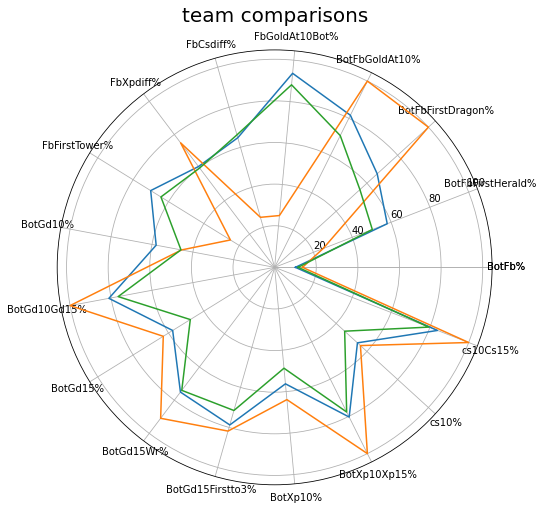

In [69]:
pie_o_matic(bot_clusters_denormalized[bot_clusters_denormalized['label'] == 0], bot_clusters_denormalized[bot_clusters_denormalized['label'] == 1], bot_clusters_denormalized[bot_clusters_denormalized['label'] == 2])

In [66]:
bot_clusters_denormalized

,BotFb%,BotFbFirstHerald%,BotFbFirstDragon%,BotFbGoldAt10%,FbGoldAt10Bot%,FbCsdiff%,FbXpdiff%,FbFirstTower%,BotGd10%,BotGd10Gd15%,BotGd15%,BotGd15Wr%,BotGd15Firstto3%,BotXp10%,BotXp10Xp15%,cs10%,cs10Cs15%
0,9.968530,58.023921,66.705517,81.664169,93.650794,64.753302,60.712898,70.064658,57.928815,81.031517,57.638515,75.123288,78.745298,56.222599,80.370999,53.854240,83.936718
1,13.392857,25.000000,100.000000,100.000000,25.000000,25.000000,75.000000,25.000000,45.535714,100.000000,62.946429,90.909091,81.818182,63.839286,100.000000,55.803571,100.000000
2,11.274881,50.343915,55.454145,70.736332,88.108466,66.194885,59.814815,64.272487,45.793073,76.514367,47.675002,74.071045,71.525442,48.684356,77.660046,45.543636,79.494805


### Dependencia sobre los jugadores del rol "ADC" o "carril inferior"

Este conjunto de atributos esta diseñado para analizar la capacidad de un jugador del rol "adc" en aprovechar una ventaja temprana en el juego y mantenerla o incrementarla, primero de las primeras sangres que obtiene un equipo todos los conjuntos coinciden en tener una cantidad baja de recursos invertidos al "adc" donde a lo mas los equipos con la categoría 1 tienen 13.39% de las primeras sangres y lo minimo de inversión es por los equipos de la categoría 0 con 9.96% de primeras sangres, asi que veamos que tan bien pueden aprovechar estos jugadores las pocas inversiones que hacen los equipos hacia ellos.

Primero cabe destacar el gran contraste que tienen los equipos con la etiqueta 1, siempre que obtienen la primera sangre para el "adc" logran obtener el primer dragon de la partida (100%) y ademas logran tener la ventaja global de oro al minuto 10 (100%) pero el jugador "adc" de estos equipos solo logra generar una ventaja contra su oponente de linea 25% de las veces incluso despues de obtener la ventaja de la primera sangre asi como solo 25% de las veces logra generar una ventaja de subditos y tambien coincide con unicamente 25% de las veces obtienen el primer heraldo de la partida (objetivo que se encuentra en el lado opuesto del mapa).
Por otro lado los "adc" de los equipos etiquetados con 1 logran generar una ventaja de experiencia contra su oponente de linea 75% de las veces que obtienen la primer sangre. otra cosa que cabe resaltar de esto es la consistencia de este jugador para mantener las ventajas que logra conseguir temprano y extenderlas entre el minuto 10 y 15 ya que 100% de las veces mantienen la ventaja  de oro, experiencia y subditos entre el minuto 10 y 15 del juego, y ademas de esto los equipos con la etiqueta 1 tienen 90.90% de porcentaje de victorias cada que invierten en el jugador "adc".

Por otro lado el desempeño de los jugadores "adc" no se diferencía mucho entre los otros 2 grupos al tener resultados relativamente similares on unas minimas diferencias de desempeño.

In [22]:
mid_clusters.columns = mid_df.columns

In [23]:
mid_clusters_denormalized = mid_clusters*(mid_df.max() - mid_df.min())+mid_df.min()

,MidFb%,MidFbFirstHerald%,MidFbFirstDragon%,MidFbGoldAt10%,FbGoldAt10Mid%,FbCsdiff%,FbXpdiff%,FbFirstTower%,MidGd10%,MidGd10Gd15%,MidGd15%,MidGd15Wr%,MidGd15Firstto3%,MidXp10%,MidXp10Xp15%,cs10%,cs10Cs15%
0,11.965200,66.662075,58.825922,83.343172,90.854650,56.250820,62.773186,69.201758,61.510480,87.704399,65.996696,76.172909,77.646104,61.592221,82.927524,58.483325,88.681562
1,17.410714,25.000000,100.000000,100.000000,100.000000,25.000000,0.000000,25.000000,63.839286,73.333333,66.964286,85.000000,80.000000,46.428571,70.833333,66.964286,90.000000
2,8.239666,44.722222,41.278660,77.861552,76.582892,43.862434,47.275132,49.056437,49.254179,79.739527,51.908995,71.037938,69.727022,50.866922,71.908222,46.858063,80.143434


In [25]:
mid_clusters_denormalized.insert(0, "label", [0, 1, 2])

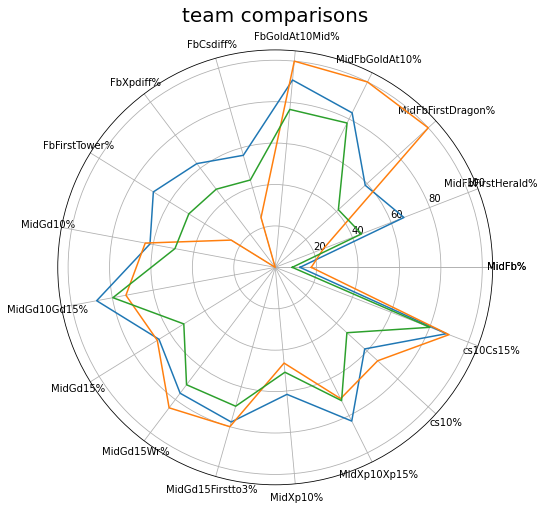

In [26]:
pie_o_matic(mid_clusters_denormalized[mid_clusters_denormalized['label'] == 0], mid_clusters_denormalized[mid_clusters_denormalized['label'] == 1], mid_clusters_denormalized[mid_clusters_denormalized['label'] == 2])

In [27]:
mid_clusters_denormalized

,label,MidFb%,MidFbFirstHerald%,MidFbFirstDragon%,MidFbGoldAt10%,FbGoldAt10Mid%,FbCsdiff%,FbXpdiff%,FbFirstTower%,MidGd10%,MidGd10Gd15%,MidGd15%,MidGd15Wr%,MidGd15Firstto3%,MidXp10%,MidXp10Xp15%,cs10%,cs10Cs15%
0,0,11.965200,66.662075,58.825922,83.343172,90.854650,56.250820,62.773186,69.201758,61.510480,87.704399,65.996696,76.172909,77.646104,61.592221,82.927524,58.483325,88.681562
1,1,17.410714,25.000000,100.000000,100.000000,100.000000,25.000000,0.000000,25.000000,63.839286,73.333333,66.964286,85.000000,80.000000,46.428571,70.833333,66.964286,90.000000
2,2,8.239666,44.722222,41.278660,77.861552,76.582892,43.862434,47.275132,49.056437,49.254179,79.739527,51.908995,71.037938,69.727022,50.866922,71.908222,46.858063,80.143434


### Dependencia sobre los jugadores del rol "mid"

El rol de "mid" es uno de los mas importantes en el juego dada la ubicación del carril donde esatn asignados, ellos se encuentran en la linea que parte el mapa de manera diagonal y tambien es la ruta mas rapida y directa entre las dos bases, el control de la linea intermedia permite influenciar todo el mapa y es comunmente referida a las mas importante del juego.

Podemos notar que los equipos que tienen la etiqueta 2 tienen el menor enfoque en sus jugadores "mid" donde solo 8.23% de las veces enfocan la primera sangre en ellos, solo 44.72% y 41.27% de las veces pueden convertir esta primera sangre en un heraldo o dragon respectivamente, sin embargo, son capaces de obtener la ventaja de oro global y ventaja de oro contra su oponente de linea 77.86% y 76.58% de las veces respectivamente, solo la mitad de las veces (49.056) son capaces de convertir la primera sangre en la primer torreta del juego. Solo la mitad de las veces son capaces de generar una ventaja de oro al minuto 10 49.25% de las partidas y su conversión al minuto 15 de esta ventaja es de 79.73%, solo 46.85% de las partidas son capaces de generar una ventaja de subditos al minuto 10 pero si la logran generar 80.14% de las partidas logran mantenerla.

Los equipos con la etiqueta 0 tienen 11.96% de las veces la primera sangre en su jugador "mid", donde estos jugadores destacan es en generar ventajas de linea ya que tienen el mayor procentaje de ventajas de linea generadas teniend 56.26% de las partidas con una ventaja de subditos (la mayor de los 3 grupos) y 62.77% de las partidas logran generar una ventaja de experiencia (la mayor de los 3 grupos) siempre que obtienen la primera sangre, asi como la mayor cantidad de primeras torretas despues de obtener la primera sangre con 69.20% de las partidas. Solo 61.51% de las partidas logran generar una ventaja al minuto 10 pero son los que mejor logran extender esta ventaja ya que 87.70% de las partidas con ventaja al minuto 10 logran extenderla al minuto 15, asi mismo tambien tienen la mejor conversión de ventaja de experiencia al tener la ventaja de experiencia mas frecuente de todos con 61.59% de las partidas y logrando extenderla al minuto 15 82.92% de las veces.

Por ultimo los equipos con la etiqueta 1 tienen el mayor enfoque sobre su jugador del carril "mid" con 17.41% de las partidas obteniendo la primera sangre del juego, siempre que consigue la primera sangre del juego logran obtener el primer dragon del juego asi como la ventaja de oro global al minuto 10 y la ventaja contra su oponente de linea al minuto 10, 63.83% de las veces logran conseguir ventaja de oro con o sin la primera sangre del juego, sin embargo lo importante notar es que 73.33% de las partidas que logran obtener una ventaja contra su oponente de linea al minuto 10 lo logran extender al minuto 15, en general logran obtener la ventaja al minuto 15 66.96% de las partidas que jugadas... Pero 85% de las partidas que el jugador "mid" tiene la ventaja al minuto 15 logran ganar la partida.

In [29]:
jng_clusters.insert(0, "label", [0, 1, 2])

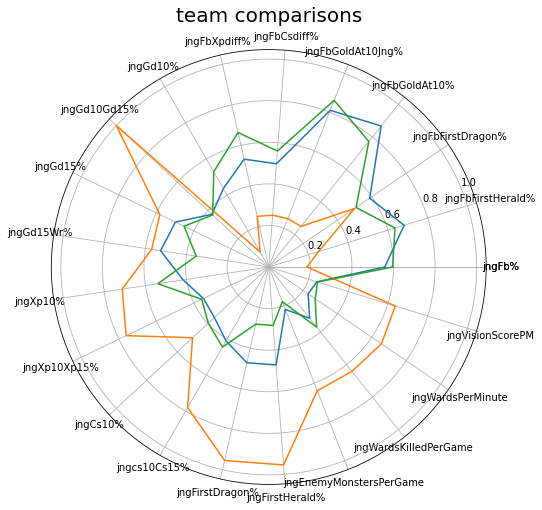

In [30]:
pie_o_matic(jng_clusters[jng_clusters['label'] == 0], jng_clusters[jng_clusters['label'] == 1], jng_clusters[jng_clusters['label'] == 2])

In [32]:
jng_clusters[attr_1]

,label,jngFb%,jngFbFirstHerald%,jngFbFirstDragon%,jngFbGoldAt10%,jngFbGoldAt10Jng%,jngFbCsdiff%,jngFbXpdiff%,jngGd10%,jngGd10Gd15%
0,0,0.558043,0.681265,0.587683,0.867315,0.809673,0.498030,0.532042,0.436127,0.372675
1,1,0.184028,0.250000,0.500000,0.250000,0.250000,0.250000,0.250000,0.082899,1.000000
2,2,0.595528,0.635779,0.508339,0.772303,0.861124,0.559461,0.663527,0.528899,0.367888


In [33]:
jng_clusters[attr_2]

,jngGd15%,jngGd15Wr%,jngXp10%,jngXp10Xp15%,jngCs10%,jngcs10Cs15%,jngFirstDragon%,jngFirstHerald%,jngEnemyMonstersPerGame,jngWardsKilledPerGame,jngWardsPerMinute,jngVisionScorePM
0,0.498112,0.526043,0.416508,0.348596,0.356956,0.410717,0.472375,0.472375,0.219092,0.315612,0.229163,0.242087
1,0.581250,0.569444,0.712838,0.761111,0.500000,0.780303,0.954545,0.954545,0.639165,0.641907,0.655911,0.636741
2,0.452090,0.353109,0.539024,0.357987,0.396830,0.444953,0.281689,0.281689,0.179208,0.369223,0.270407,0.245397


### Dependencia sobre los jugadores del rol "jungla"

Este rol es comunmente relacionado con un "comodin" donde los jugadores de este rol no estan asociados con alguna sección del mapa, sino ellos se mueven al rededor del mapa y son encargados de limpiar las secciones del mapa conocidas como "jungla" asi como tienen una herramienta especial para matar monstruos legendarios como los dragones, heraldos y baron. Los atributos no han sido desnormalizados por la co-existencia de atributos no porcentuales.

Aqui tenemos una diferencia extremadamente contrastante, donde podemos observar la distinta utilización de los jugadores en los estilos de juego, donde los equipos etiquetados con 0 y 2 tienen un porcentaje de primera sangre de aproximadamente 18% o mas (desnormalizado) mientras que los equipos con la etiqueta 1 tienen un porcentaje de primera sangre aproximadamente de 7% un completo contraste, a que se debe esta gran diferencia? los "jungla" de los equipos con la etiqueta 1 estan mucho mas decantados a control de visión en todo el mapa asi como un gran enfoque en robo de monstruos neutrales de la jungla enemiga y objetivos legendarios como dragones y heraldos con un control aproximado de 65% de estos objetivos (desnormalizado), todo esto sin tomar importancia sobre el desempeño propio.

Por otro lado tenemos un contraste no tan resaltado como con los equipos con la etiqueta 1, pero los equipos con la etiqueta 0 tienen un jugador "jungla" con un enfoque un poco mas decantado a los objetivos neutrales mientras que los equipos con la etiqueta 2 tienen un enfoque mas personal sobre su propio desempeño en el juego.

### League of Legends como un esport global

Como videojuego competitivo League of Legends (LoL) ha sido uno de los videojuegos más exitosos en la ultima decada, segun la pagina web https://newzoo.com LoL es el videojuego de PC más popular en todo el mundo, inclusive en regiones estrictas con la restricción de media como china este es el videojuego mas popular. El prestigio de competir en un campeonato mundial es extremadamente alto.

Esto significa que de igual manera que hay aproximadamente 124 millones de jugadores al mes, debe haber multiples formas de jugar este videojuego, ¿Cierto? cierto... pero falso a la vez! En el pico de la montaña de habilidad de LoL, osea la escena competitiva, es posible notar que las formas de jugar en realidad son más limitadas de lo que parece.
Para poder entender las formas de juego de LoL es necesario entender algunos factores externos al juego:
- LoL cambia anualmente, cada año hay un parche masivo que cambia aspectos mayores del juego (esto es conocido como cambio de temporada)
- LoL hace cambios menores cada 2 semanas
- Los cambios durante torneos mayores (el campeonato mundial y el invitacional de media temporada) no son reflejados en el torneo y se juega con una versión congelada.
- Los equipos profesionales de LoL suelen cambiar 1 o 2 jugadores cada año (al terminar la temporada) 
- El campeonato mundial de LoL marca el final de una temporada y el ultimo evento competitivo oficial de Riot Games (desarrollador de LoL)

Esto en que influye? Significa que se tiene un tiempo limitado para desarrollar estrategias, composiciones de equipo e incluso sinergia entre los jugadores de un mismo equipo. Sabiendo estas restricciones en mente, podriamso tambien pensar que el mejor punto para analizar los distintos o no tan distintos estilos de juego de LoL competitivo es el campeonato mundial, no solo tendremos los mejores representantes de cada región de LoL pero tambien podremos contrastar la forma en que juegan.

### Nociones existentes sobre las regiones de LoL

Durante los ultimos 10 daños de LoL se ha logrado clasificar las regiones según su desempeño internacional año con año.
Las dos regiones mas dominantes han sido China (LPL) y Corea (LCK), la LCK tiene en total 6 campeonatos mundiales obtenidas (2013, 2014, 2015, 2016, 2017, 2020) y la LPL tiene 2 campeonatos mundiales (2018, 2019), por otro lado Europa (LEC) ha logrado conseguir un unico campeonato mundial (2011) y es la unica region no asiatica que ha logrado jugar al nivel de China y Corea. Estas tres regiones conforman lo que se conoce como regiones de primer nivel (tier 1).

Algo sorprendente es que a pesar de haber ganado un campeonato mundial (2012) la región del sur-este de Asía (PCS) no ha logrado que algun otro representante muestre la misma capacidad que el equipo que logro ganar el campeonato mundial en 2012, asi mismo Norte América no ha logrado ganar un campeonato mundial, de hecho jamas a llegado mas haya de las semi-finales del campeonato mundial, sin embargo, estas dos regiones son conocidas como regiones de nivel 2 (tier 2) porque consistentemente logran llegar a fase de grupos del campeonato mundial y algunas veces avanzar a los play-offs.

A pesar de que la diferencia entre los equipos de nivel 1 y nivel 2 es relativamente alta, la diferencia entre las regiones consideradas de nivel 3 (tier 3) y las regionesl nivel 2 y 1 es extremadamente alta, estas regiones no han logrado avanzar al campeonato mundial en multiples ocasiones, o si lo han logrado han terminado unicamente en fase de grupos. Estas son regiones como Brasil (CBLOL), Latinoámerica (LLA), Comunidad de Estados Independientes (LCL), Japón (LJL), Oceanía (OPL), Turquía (TCL).

¿Cuál es la importancia de esta información? es necesario saber las comparaciones conocidas entre regiones para no interpretar de manera errónea la información que se presenta, ya que las regiones de nivel 3 suelen tener un único euqipo que domina la región y por lo tanto las estadisticas que presentan sobre su desempeño suelen parecer infladas en comparación al resto de los equipos.